In [1]:
import numpy as np

In [41]:
from keras.layers import Conv2D, Activation, MaxPool2D, Flatten, Dense
from keras.models import Sequential

# Images fed into this model are 512 x 512 pixels with 3 channels
img_shape = (28,28,1)

# Set up model
model = Sequential()

# Add convolutional layer with 3, 3 by 3 filters and a stride size of 1
# Set padding so that input size equals output size
model.add(Conv2D(6,3,input_shape=img_shape))
# Add relu activation to the layer 
model.add(Activation('relu'))

model.add(MaxPool2D(2))

model.add(Conv2D(12,3))

model.add(Activation('relu'))

model.add(MaxPool2D(2))

model.add(Flatten())

model.add(Dense(10))

model.add(Activation('softmax'))

In [42]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 6)         60        
_________________________________________________________________
activation_18 (Activation)   (None, 26, 26, 6)         0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 12)        660       
_________________________________________________________________
activation_19 (Activation)   (None, 11, 11, 12)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 12)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 300)               0         
__________

In [43]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['acc'])

In [7]:
from keras.datasets import mnist

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_train = np.expand_dims(x_train,-1)

In [11]:
x_test = np.expand_dims(x_test,-1)

In [12]:
x_train.shape

(60000, 28, 28, 1)

In [13]:
y_train.shape

(60000,)

In [44]:
history = model.fit(x_train,
                    y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 19s 309us/step - loss: 5.3931 - acc: 0.6464 - val_loss: 1.9519 - val_acc: 0.8542
Epoch 2/10
60000/60000 [==============================] - 18s 297us/step - loss: 0.8855 - acc: 0.9136 - val_loss: 0.1279 - val_acc: 0.9635
Epoch 3/10
60000/60000 [==============================] - 18s 305us/step - loss: 0.1078 - acc: 0.9699 - val_loss: 0.0999 - val_acc: 0.9704
Epoch 4/10
60000/60000 [==============================] - 18s 304us/step - loss: 0.0840 - acc: 0.9752 - val_loss: 0.0779 - val_acc: 0.9796
Epoch 5/10
60000/60000 [==============================] - 18s 308us/step - loss: 0.0721 - acc: 0.9774 - val_loss: 0.0727 - val_acc: 0.9758
Epoch 6/10
60000/60000 [==============================] - 18s 307us/step - loss: 0.0624 - acc: 0.9808 - val_loss: 0.0678 - val_acc: 0.9796
Epoch 7/10
60000/60000 [==============================] - 18s 304us/step - loss: 0.0557 - acc: 0.9824 - val_loss: 0.

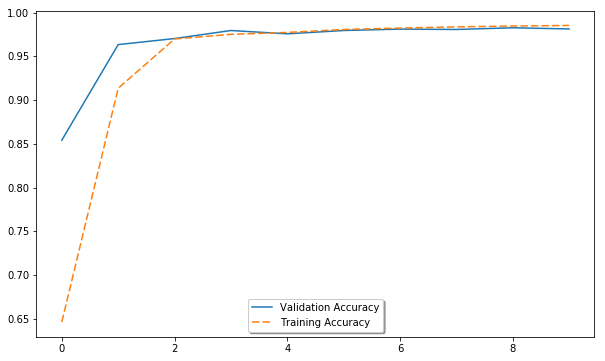

In [45]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))
gen = ax.plot(history.history['val_acc'], label='Validation Accuracy')
fr = ax.plot(history.history['acc'],dashes=[5, 2], label='Training Accuracy')

legend = ax.legend(loc='lower center', shadow=True)

plt.show()

In [29]:
history.history

{'acc': [0.78751666666666664,
  0.96399999999999997,
  0.9745166666666667,
  0.97828333333333328,
  0.98121666666666663],
 'loss': [2.6721490326330066,
  0.12396917544280489,
  0.083889094699057754,
  0.069084088668506599,
  0.059164642429499266],
 'val_acc': [0.95669999999999999,
  0.97409999999999997,
  0.97589999999999999,
  0.9728,
  0.97960000000000003],
 'val_loss': [0.14562211257070304,
  0.084075064436299723,
  0.077148702734848487,
  0.092111060906387862,
  0.071722510480089111]}